In [66]:
from random import seed
from random import random
import numpy as np
 
# 네트워크 초기 설정
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)] # (0 1 2) * 1
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)] # (0 1) * 2
    network.append(output_layer)
    return network
 
seed(1)
network = initialize_network(2, 1, 2)
# network[0] 는 히든레이어
# network[1] 은 출력레이어
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


In [67]:
for layer in network:
    for neuron in layer:
        print(neuron['weights'],'\n')

[0.13436424411240122, 0.8474337369372327, 0.763774618976614] 

[0.2550690257394217, 0.49543508709194095] 

[0.4494910647887381, 0.651592972722763] 



In [68]:
def activate(weights, inputs):
    activation = weights[-1] # weights 의 마지막 값 
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]  # 순전파 진행 
    return activation 

def sigmoid(activation): # 가중치
    value = 1 / (1 + np.exp(-activation))
    return value # 시그모이드 구현

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            print('input값 :',inputs)
            activation = activate(neuron['weights'], inputs)
            print('활성화 전:',activation)
            # 뉴런의 출력값이 output에 저장됨
            neuron['output'] = sigmoid(activation) # 나온 계산 값을 그대로 쓰나요? 시그모이드 함수로 변환
            new_inputs.append(neuron['output']) # new_input은 다음 히든층에 들어갈 값이죠?
        # 출력값은 다음 레이어의 input값으로 됨
        inputs = new_inputs
        print('결과값(활성화후):',inputs,'\n')
    return inputs

**여기까지는 순전파 학습과정이었습니다. 이 과정이 끝나면 가중치가 바뀌나요?  
답변을 답변의 근거 코딩 결과와 함께 보여주세요.**

![python image](IMG_0008.PNG)
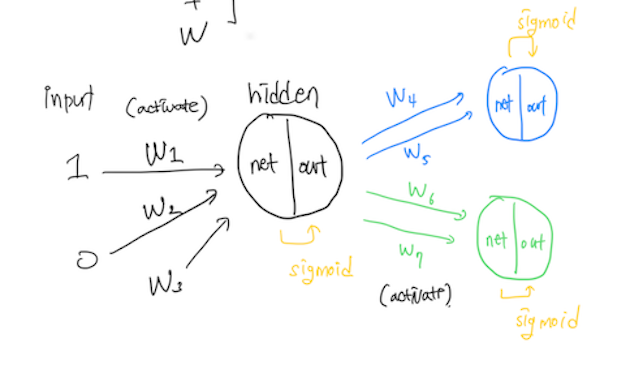

In [69]:
# 그림으로 표현하면 다음과 같다고 생각됨
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

input값 : [1, 0, None]
활성화 전: 0.8981388630890152
결과값(활성화후): [0.7105668883115941] 

input값 : [0.7105668883115941]
활성화 전: 0.6766786910162718
input값 : [0.7105668883115941]
활성화 전: 0.9709864399535617
결과값(활성화후): [0.6629970129852887, 0.7253160725279748] 

[0.6629970129852887, 0.7253160725279748]


In [70]:
network

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614],
   'output': 0.7105668883115941}],
 [{'weights': [0.2550690257394217, 0.49543508709194095],
   'output': 0.6629970129852887},
  {'weights': [0.4494910647887381, 0.651592972722763],
   'output': 0.7253160725279748}]]

In [71]:
for i in reversed(range(len(network))): # 역방향
        layer = network[i]
        print(i,layer,len(layer),'\n')

1 [{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748}] 2 

0 [{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941}] 1 



In [79]:
def sigmoid_derivative(output): # 시그모이드 미분
    value = output * (1 - output) # 출력값에 대한 기울기?
    return value 

def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))): # 역방향
        layer = network[i]
        errors = []
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta']) # 생성된 delta 로 그 전 레이어의 delta 계산
                errors.append(error) 
        else: # 먼저 진입
            for j in range(len(layer)): #출력레이어 (j = 0, 1)
                neuron = layer[j]
                errors.append(expected[j] - neuron['output']) # 역전파시 오차는 어떻게 설정했나요? 기댓값 - 출력값
        for j in range(len(layer)):
            neuron = layer[j]
            # 각 뉴런에 대해 계산된 오류(error)
            neuron['delta'] = errors[j] * sigmoid_derivative(neuron['output']) # 시그모이드 함수를 사용한 역전파 

In [80]:
expected = [0, 1]

backward_propagate_error(network, expected)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'output': 0.7105668883115941, 'delta': -0.002711797799238243}]
[{'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887, 'delta': -0.14813473120687762}, {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748, 'delta': 0.05472601157879688}]


In [39]:
# 답안
expected = [0, 1]

backward_propagate_error(network, expected)
for layer in network:
    print(layer)

[{'output': 0.7105668883115941, 'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614], 'delta': -0.0005348048046610517}]
[{'output': 0.6213859615555266, 'weights': [0.2550690257394217, 0.49543508709194095], 'delta': -0.14619064683582808}, {'output': 0.6573693455986976, 'weights': [0.4494910647887381, 0.651592972722763], 'delta': 0.0771723774346327}]


In [11]:
def weights_update(network, row, l_rate): # l_rate 학습률
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta'] # 퍼셉트론 학습 규칙 (= 델타규칙?)
            

def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row) # 순전파 
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))]) # 예측값의 오차 합
            backward_propagate_error(network, expected)
            weights_update(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [74]:
seed(1)
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

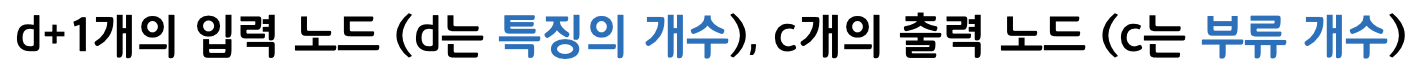

In [30]:
n_inputs = len(dataset[0]) - 1 # 뉴럴렛의 입력노드로 뭐가 들어가죠? 그럼 입력 노드의 개수는?
n_outputs = len(set([row[-1] for row in dataset]))# 뉴럴렛의 출력노드의 개수는 뭐라고 했죠? 
network = initialize_network(n_inputs, 2, n_outputs)

train_network(network, dataset, 0.8, 30, n_outputs) # 자유롭게 설정하고 최적을 찾아보세요.

# 학습된(최적화)된 네트워크가 초기 네트워크와 달리 어떻게 변하였는지 출력하시오. (layer별로,hint : for문))
for layer in network:
    print(layer)

>epoch=0, lrate=0.800, error=6.554
>epoch=1, lrate=0.800, error=5.705
>epoch=2, lrate=0.800, error=5.573
>epoch=3, lrate=0.800, error=5.551
>epoch=4, lrate=0.800, error=5.545
>epoch=5, lrate=0.800, error=5.542
>epoch=6, lrate=0.800, error=5.540
>epoch=7, lrate=0.800, error=5.537
>epoch=8, lrate=0.800, error=5.533
>epoch=9, lrate=0.800, error=5.529
>epoch=10, lrate=0.800, error=5.524
>epoch=11, lrate=0.800, error=5.517
>epoch=12, lrate=0.800, error=5.508
>epoch=13, lrate=0.800, error=5.495
>epoch=14, lrate=0.800, error=5.475
>epoch=15, lrate=0.800, error=5.440
>epoch=16, lrate=0.800, error=5.371
>epoch=17, lrate=0.800, error=5.219
>epoch=18, lrate=0.800, error=4.942
>epoch=19, lrate=0.800, error=4.576
>epoch=20, lrate=0.800, error=4.156
>epoch=21, lrate=0.800, error=3.716
>epoch=22, lrate=0.800, error=3.277
>epoch=23, lrate=0.800, error=2.843
>epoch=24, lrate=0.800, error=2.443
>epoch=25, lrate=0.800, error=2.097
>epoch=26, lrate=0.800, error=1.807
>epoch=27, lrate=0.800, error=1.572
>e

In [22]:
n_inputs = len(dataset[0]) - 1 # 뉴럴렛의 입력노드로 뭐가 들어가죠? 그럼 입력 노드의 개수는?
n_outputs = len(set([row[-1] for row in dataset]))# 뉴럴렛의 출력노드의 개수는 뭐라고 했죠? 
network = initialize_network(n_inputs, 2, n_outputs)

train_network(network, dataset, 0.5, 20, n_outputs) # 자유롭게 설정하고 최적을 찾아보세요.

# 학습된(최적화)된 네트워크가 초기 네트워크와 달리 어떻게 변하였는지 출력하시오. (layer별로,hint : for문))
for layer in network:
    print(layer)

>epoch=0, lrate=0.500, error=6.462
>epoch=1, lrate=0.500, error=5.778
>epoch=2, lrate=0.500, error=5.511
>epoch=3, lrate=0.500, error=5.423
>epoch=4, lrate=0.500, error=5.386
>epoch=5, lrate=0.500, error=5.360
>epoch=6, lrate=0.500, error=5.334
>epoch=7, lrate=0.500, error=5.297
>epoch=8, lrate=0.500, error=5.241
>epoch=9, lrate=0.500, error=5.148
>epoch=10, lrate=0.500, error=4.999
>epoch=11, lrate=0.500, error=4.803
>epoch=12, lrate=0.500, error=4.579
>epoch=13, lrate=0.500, error=4.325
>epoch=14, lrate=0.500, error=4.044
>epoch=15, lrate=0.500, error=3.747
>epoch=16, lrate=0.500, error=3.444
>epoch=17, lrate=0.500, error=3.147
>epoch=18, lrate=0.500, error=2.865
>epoch=19, lrate=0.500, error=2.604
[{'weights': [0.9695153485431512, 0.30290858145288113, 0.5738778599202632], 'output': 0.9998857073439854, 'delta': -4.364823103668958e-06}, {'weights': [1.123064968362136, -1.6456147948879705, 0.2352416903207807], 'output': 0.933115179104761, 'delta': 0.012301666552031297}]
[{'weights': [0

In [84]:
outputs

[0.6629970129852887, 0.7253160725279748]

In [31]:
# 학습한 네트워크로 예측값을 뽑아보자.
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs)) # 순전파 결과에서 어떤것이 최종 아웃풋이 되나요? 더 높은 값을 출력한 Index

In [32]:
# 네트워크가 잘 학습되었는지 확인해보자. 
for row in dataset:
    prediction = predict(network, row) # 앞서 최적(학습)시킨 네트워크로 잘 학습되었는지 평가 
    print('실제값=%d, 예측값=%d' % (row[-1], prediction))

실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1


In [44]:
# 네트워크가 잘 학습되었는지 확인해보자. 
for row in dataset:
    prediction = predict(network, row) # 앞서 최적(학습)시킨 네트워크로 잘 학습되었는지 평가 
    print('실제값=%d, 예측값=%d' % (row[-1], prediction))

실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=0, 예측값=0
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
실제값=1, 예측값=1
